## **Fixação Classificação**

In [128]:
!wget -q 'https://raw.githubusercontent.com/OviedoVR/ML_especializacao_2025/refs/heads/main/dados/fixacao/credit_risk.csv' -O 'credit.csv'

In [153]:
# Bibliotecas
# Manip. dados:
import pandas as pd
import numpy as np

# Gráficos:
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [130]:
dados = pd.read_csv('credit.csv')
dados.head()

,rev_util,age,late_30_59,debt_ratio,monthly_inc,open_credit,late_90,real_estate,late_60_89,dependents,dlq_2yrs
0,0.006999,38.0,0.0,0.302150,5440.0,4.0,0.0,1.0,0.0,3.0,0
1,0.704592,63.0,0.0,0.471441,8000.0,9.0,0.0,1.0,0.0,0.0,0
2,0.063113,57.0,0.0,0.068586,5000.0,17.0,0.0,0.0,0.0,0.0,0
3,0.368397,68.0,0.0,0.296273,6250.0,16.0,0.0,2.0,0.0,0.0,0
4,1.000000,34.0,1.0,0.000000,3500.0,0.0,0.0,0.0,0.0,1.0,0


In [131]:
dados.shape

(16714, 11)

In [132]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rev_util     16714 non-null  float64
 1   age          16714 non-null  float64
 2   late_30_59   16714 non-null  float64
 3   debt_ratio   16714 non-null  float64
 4   monthly_inc  16714 non-null  float64
 5   open_credit  16714 non-null  float64
 6   late_90      16714 non-null  float64
 7   real_estate  16714 non-null  float64
 8   late_60_89   16714 non-null  float64
 9   dependents   16714 non-null  float64
 10  dlq_2yrs     16714 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.4 MB


In [133]:
dados['age'] = dados['age'].astype('int64')

In [134]:
dados.isna().sum()

,0
rev_util,0
age,0
late_30_59,0
debt_ratio,0
monthly_inc,0
open_credit,0
late_90,0
real_estate,0
late_60_89,0
dependents,0


In [135]:
features.columns

Index(['age', 'late_30_59', 'monthly_inc', 'late_90', 'late_60_89',
       'dependents'],
      dtype='object')

In [136]:
dados.describe()

,rev_util,age,late_30_59,debt_ratio,monthly_inc,open_credit,late_90,real_estate,late_60_89,dependents,dlq_2yrs
count,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000
mean,4.799862,48.798672,1.110267,30.980298,6118.120258,8.503709,0.863827,1.047445,0.734354,0.944358,0.500000
std,204.062345,13.906078,7.172890,719.694859,5931.841779,5.370965,7.167576,1.272565,7.138737,1.198791,0.500015
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.082397,38.000000,0.000000,0.155971,3128.500000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.443080,48.000000,0.000000,0.322299,5000.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.500000
75%,0.926637,58.000000,1.000000,0.533426,7573.000000,11.000000,0.000000,2.000000,0.000000,2.000000,1.000000
max,22000.000000,101.000000,98.000000,61106.500000,250000.000000,57.000000,98.000000,29.000000,98.000000,8.000000,1.000000


In [137]:
idades = dados.query('age < 50').groupby('age', as_index=False)['age'].value_counts()
idades['Freq. rel'] = idades['count'] / len(dados) * 100
idades['Freq. acumulada'] = idades['Freq. rel'].cumsum()
idades.style.background_gradient(subset='Freq. acumulada')

,age,count,Freq. rel,Freq. acumulada
0,21,16,0.095728,0.095728
1,22,46,0.275218,0.370947
2,23,88,0.526505,0.897451
3,24,108,0.646165,1.543616
4,25,141,0.843604,2.387220
5,26,179,1.070958,3.458179
6,27,216,1.292330,4.750509
7,28,259,1.549599,6.300108
8,29,250,1.495752,7.795860
9,30,305,1.824818,9.620677


<Axes: >

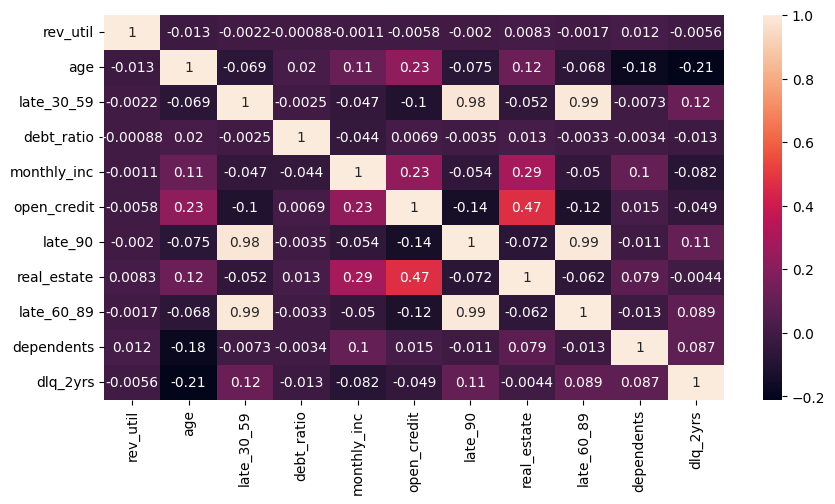

In [138]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(dados.corr(), annot=True)

In [139]:
dados.columns

Index(['rev_util', 'age', 'late_30_59', 'debt_ratio', 'monthly_inc',
       'open_credit', 'late_90', 'real_estate', 'late_60_89', 'dependents',
       'dlq_2yrs'],
      dtype='object')

In [140]:
dados_modelagem = dados.copy()
dados_modelagem = dados_modelagem[[
    'age', 'late_30_59', 'monthly_inc', 'late_90', 'late_60_89', 'dependents', 'dlq_2yrs'
]]
dados_modelagem.head()

,age,late_30_59,monthly_inc,late_90,late_60_89,dependents,dlq_2yrs
0,38,0.0,5440.0,0.0,0.0,3.0,0
1,63,0.0,8000.0,0.0,0.0,0.0,0
2,57,0.0,5000.0,0.0,0.0,0.0,0
3,68,0.0,6250.0,0.0,0.0,0.0,0
4,34,1.0,3500.0,0.0,0.0,1.0,0


In [141]:
dados_modelagem.shape

(16714, 7)

In [142]:
# Exlusão de outliers:
dados_modelagem = dados_modelagem.query('age <= 92 and late_30_59 <= 80 and monthly_inc <= 150000 and late_90 < 30')
dados_modelagem.shape

(16612, 7)

In [143]:
features = dados_modelagem.drop('dlq_2yrs', axis=1)
target = dados_modelagem[['dlq_2yrs']]

# Divisão treino teste:
x_treino, x_teste, y_treino, y_teste = train_test_split(
    features, target, test_size=0.3, random_state=42
)

print(x_treino.shape)
print(y_treino.shape)
print(x_teste.shape)
print(y_teste.shape)

(11628, 6)
(11628, 1)
(4984, 6)
(4984, 1)


In [144]:
scaler = StandardScaler()

# Normalização treino:
x_treino['age'] = scaler.fit_transform(x_treino[['age']])
x_treino['late_30_59'] = scaler.fit_transform(x_treino[['late_30_59']])
x_treino['late_60_89'] = scaler.fit_transform(x_treino[['late_60_89']])
x_treino['monthly_inc'] = scaler.fit_transform(x_treino[['monthly_inc']])
x_treino['late_90'] = scaler.fit_transform(x_treino[['late_90']])
x_treino['dependents'] = scaler.fit_transform(x_treino[['dependents']])

# Normalização teste:
x_teste['age'] = scaler.fit_transform(x_teste[['age']])
x_teste['late_30_59'] = scaler.fit_transform(x_teste[['late_30_59']])
x_teste['late_60_89'] = scaler.fit_transform(x_teste[['late_60_89']])
x_teste['monthly_inc'] = scaler.fit_transform(x_teste[['monthly_inc']])
x_teste['late_90'] = scaler.fit_transform(x_teste[['late_90']])
x_teste['dependents'] = scaler.fit_transform(x_teste[['dependents']])

```python
from sklearn.neighbors import KNeighborsClassifier

# Dados fictícios
X, y = ..., ...

# Treinamento do modelo
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)

# Predições
y_pred = model.predict(X)
 ```  

In [145]:
# Treinamento do modelo
model = KNeighborsClassifier(n_neighbors=4)
model.fit(x_treino, y_treino)
model.__dict__

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'n_neighbors': 4,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform',
 'feature_names_in_': array(['age', 'late_30_59', 'monthly_inc', 'late_90', 'late_60_89',
        'dependents'], dtype=object),
 'n_features_in_': 6,
 'outputs_2d_': False,
 'classes_': array([0, 1]),
 '_y': array([1, 0, 1, ..., 0, 0, 1]),
 'effective_metric_params_': {},
 'effective_metric_': 'euclidean',
 '_fit_method': 'kd_tree',
 '_fit_X': array([[ 0.22677899,  2.18866031, -0.34067222,  1.73289914,  6.0453305 ,
          0.03923383],
        [ 0.22677899, -0.53091033, -0.62741956, -0.35606532, -0.33961914,
          2.53218969],
        [ 1.38135793, -0.53091033, -0.75860876, -0.35606532, -0.33961914,
         -0.79175146],
        ...,
        [ 1.16487438, -0.53091033,  0.89334907, -0.35606532, -0.33961914,
         -0.79175146],
        [-1.43292823,  0.37561321, -0.79232219, -0.35606532, -0.33961914,
       

In [146]:
y_pred_treino = model.predict(x_treino)
y_pred_teste = model.predict(x_teste)
probabilidades = model.predict_proba(x_teste)[:, 1]

print(y_pred_teste[0:15])
print(probabilidades[0:15])
print(y_teste[0:15])

[0 0 0 1 1 1 0 0 1 1 0 0 1 0 0]
[0.   0.   0.25 1.   1.   0.75 0.25 0.5  1.   0.75 0.5  0.5  0.75 0.
 0.  ]
       dlq_2yrs
4774          0
13677         1
11985         1
14169         1
11311         1
7540          0
9324          1
14132         1
10750         1
10039         1
3451          0
3440          0
14711         1
2070          0
15756         1


In [147]:
# Alterando a probabilidade de corte:
probs = model.predict_proba(x_teste)[:, 1]
threshold = 0.75
ypred_custom = (probs >= threshold).astype(int)

# Predições:
print('Predições com threshold =', threshold)
print(ypred_custom[0:14])
print(y_teste[0:14])
print('\nProbabilidades da classe 1')
print(np.round(probs[0:14], 2))

Predições com threshold = 0.75
[0 0 0 1 1 1 0 0 1 1 0 0 1 0]
       dlq_2yrs
4774          0
13677         1
11985         1
14169         1
11311         1
7540          0
9324          1
14132         1
10750         1
10039         1
3451          0
3440          0
14711         1
2070          0

Probabilidades da classe 1
[0.   0.   0.25 1.   1.   0.75 0.25 0.5  1.   0.75 0.5  0.5  0.75 0.  ]


In [148]:
acuracia = accuracy_score(y_teste, y_pred_teste)
acuracia

0.7114767255216693

<Axes: >

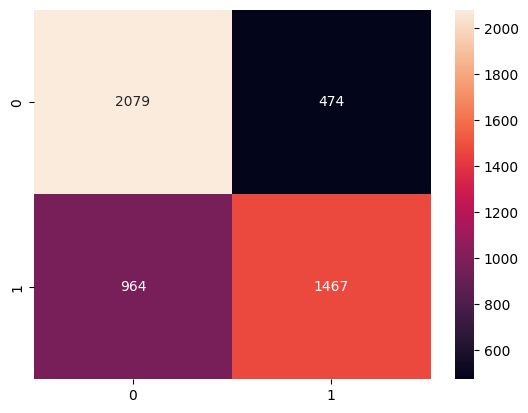

In [149]:
matriz_conf = confusion_matrix(y_teste, y_pred_teste)
sns.heatmap(matriz_conf, annot=True, fmt='d')

In [150]:
print(classification_report(y_teste, y_pred_teste))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74      2553
           1       0.76      0.60      0.67      2431

    accuracy                           0.71      4984
   macro avg       0.72      0.71      0.71      4984
weighted avg       0.72      0.71      0.71      4984



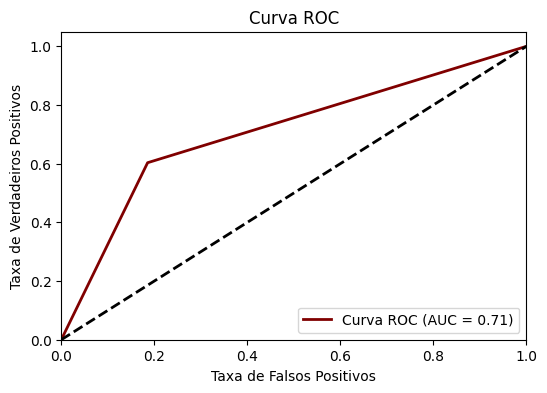

In [151]:
# Calcular a curva ROC e a AUC
fpr, tpr, thresholds = roc_curve(y_teste, y_pred_teste)
roc_auc = roc_auc_score(y_teste, y_pred_teste)

# Plotar a curva ROC
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(fpr, tpr, color='maroon', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

<Axes: ylabel='dlq_2yrs'>

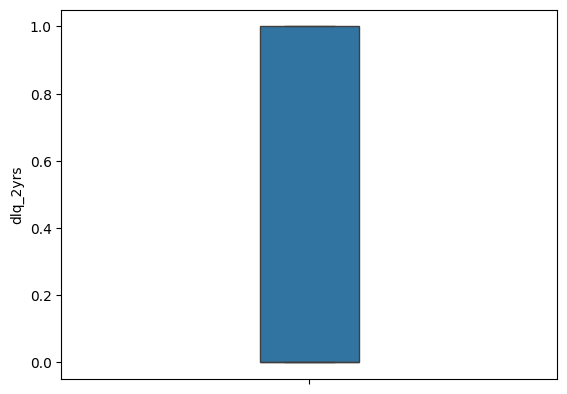

In [152]:
sns.boxplot(data=dados_modelagem, y='dlq_2yrs', width=0.2)

In [154]:
modelo_reglog = LogisticRegression()
modelo_reglog.fit(x_treino, y_treino)
modelo_reglog.__dict__

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 100,
 'multi_class': 'deprecated',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'feature_names_in_': array(['age', 'late_30_59', 'monthly_inc', 'late_90', 'late_60_89',
        'dependents'], dtype=object),
 'n_features_in_': 6,
 'classes_': array([0, 1]),
 'n_iter_': array([10], dtype=int32),
 'coef_': array([[-0.35756223,  0.82534867, -0.10532641,  1.21908974,  0.7201354 ,
          0.06392037]]),
 'intercept_': array([0.38769193])}

\begin{equation}
 risco\  credito = 0.38  -0.35 \times age + 0.83 \times late\_30\_59 -0.11 \times monthly\_inc + 1.22 \times late\_90 + 0.72 \times late\_60\_89 +
          0.06 \times dependents
\end{equation}

In [155]:
np.exp(1*0.06)

np.float64(1.0618365465453596)

In [159]:
np.exp(-100*0.11)

np.float64(1.670170079024566e-05)

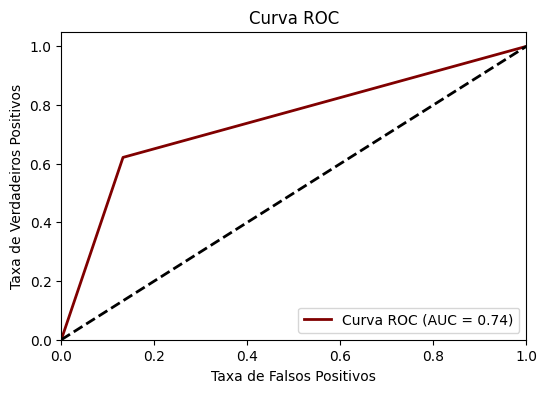

In [160]:
y_pred_teste_log = modelo_reglog.predict(x_teste)

# Calcular a curva ROC e a AUC


fpr, tpr, thresholds = roc_curve(y_teste, y_pred_teste_log)
roc_auc = roc_auc_score(y_teste, y_pred_teste_log)

# Plotar a curva ROC
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(fpr, tpr, color='maroon', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [161]:
print(classification_report(y_teste, y_pred_teste_log))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78      2553
           1       0.82      0.62      0.71      2431

    accuracy                           0.75      4984
   macro avg       0.76      0.74      0.74      4984
weighted avg       0.76      0.75      0.74      4984



In [162]:
confusion_matrix(y_teste, y_pred_teste_log)

array([[2214,  339],
       [ 920, 1511]])